In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data=pd.read_csv("train_2v.csv")
train=pd.read_csv("test_2v.csv")

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
data.shape

(43400, 12)

In [6]:
train.shape

(18601, 11)

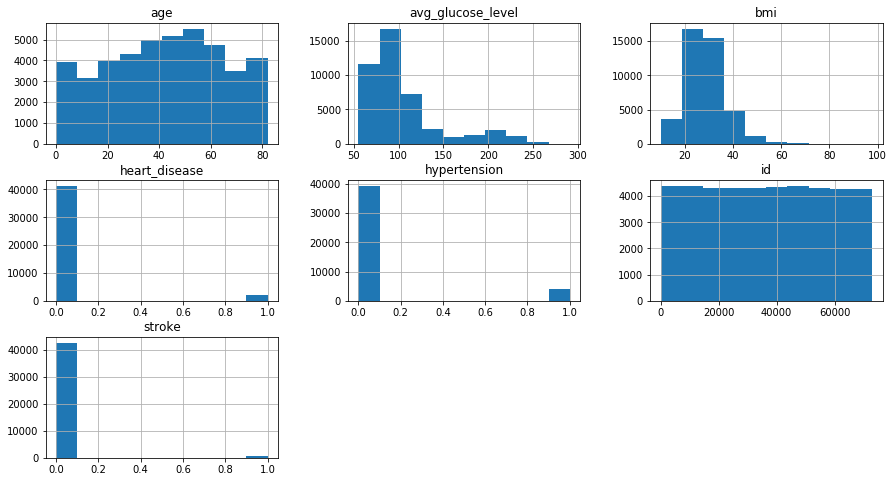

In [7]:
data.hist(figsize=[15,8])
plt.show()

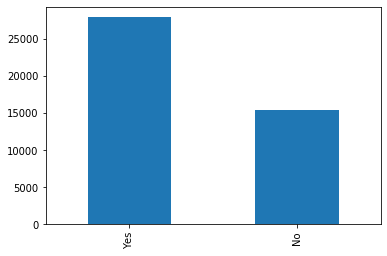

In [8]:
data['ever_married'].value_counts().plot.bar()
plt.show()

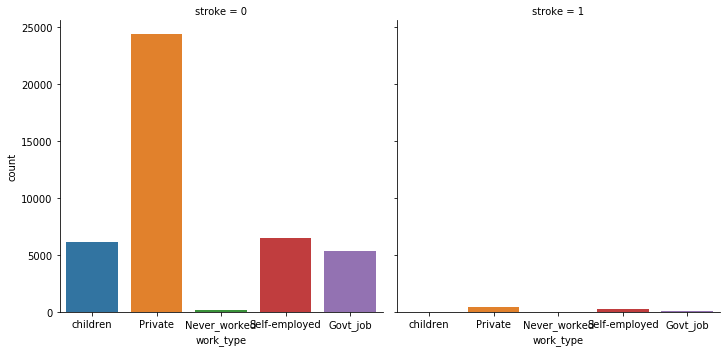

In [122]:
sns.catplot(x='work_type',kind='count',col='stroke',data=data)

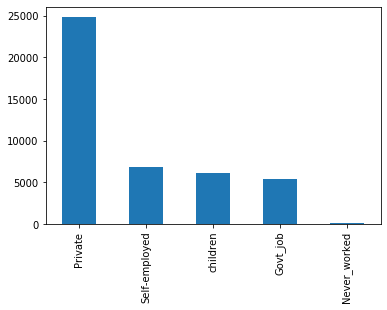

In [125]:
data['work_type'].value_counts().plot(kind='bar')

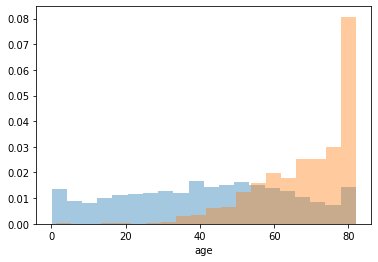

In [124]:
sns.distplot(data.loc[data['stroke'] == 0]['age'],kde=False, norm_hist=True, bins=20)
sns.distplot(data.loc[data['stroke'] == 1]['age'],kde=False, norm_hist=True, bins=20)

In [10]:
data.bmi=data['bmi'].fillna(data['bmi'].mean())

In [11]:
x=data.drop(['id','stroke'],axis=1)
y=data['stroke']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  43400 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [13]:
data[data['smoking_status'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
10,10460,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43382,35179,Female,9.0,0,0,No,children,Urban,68.49,16.8,NaN,0
43385,5366,Female,66.0,0,0,Yes,Self-employed,Urban,92.10,24.8,NaN,0
43389,30759,Male,14.0,0,0,No,children,Urban,82.48,24.8,NaN,0
43391,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0


In [14]:
data['work_type'].value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [15]:
data['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lb=LabelEncoder()
x['gender']=lb.fit_transform(x['gender'])
x['ever_married']=lb.fit_transform(x['ever_married'])
x['Residence_type']=lb.fit_transform(x['gender'])

In [17]:
x=x.join(pd.get_dummies(x['work_type']))

In [18]:
x=x.drop(['work_type','Self-employed'],axis=1)

In [19]:
x

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,Govt_job,Never_worked,Private,children
0,1,3.0,0,0,0,1,95.12,18.0,NaN,0,0,0,1
1,1,58.0,1,0,1,1,87.96,39.2,never smoked,0,0,1,0
2,0,8.0,0,0,0,0,110.89,17.6,NaN,0,0,1,0
3,0,70.0,0,0,1,0,69.04,35.9,formerly smoked,0,0,1,0
4,1,14.0,0,0,0,1,161.28,19.1,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0,0,0,0,58.64,20.4,never smoked,0,0,0,1
43396,0,56.0,0,0,1,0,213.61,55.4,formerly smoked,1,0,0,0
43397,0,82.0,1,0,1,0,91.94,28.9,formerly smoked,0,0,1,0
43398,1,40.0,0,0,1,1,99.16,33.2,never smoked,0,0,1,0


In [20]:
s_data=x[~x.smoking_status.isna()]
s_test=x[x.smoking_status.isna()]
s_test=s_test.drop('smoking_status',axis=1)

In [23]:
s_x=s_data.drop('smoking_status',axis=1)
s_y=s_data['smoking_status']
from sklearn.svm import SVC
vm=SVC()
vm.fit(s_x,s_y)

/home/ubu/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
s_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30108 entries, 1 to 43399
Data columns (total 12 columns):
gender               30108 non-null int64
age                  30108 non-null float64
hypertension         30108 non-null int64
heart_disease        30108 non-null int64
ever_married         30108 non-null int64
Residence_type       30108 non-null int64
avg_glucose_level    30108 non-null float64
bmi                  30108 non-null float64
Govt_job             30108 non-null uint8
Never_worked         30108 non-null uint8
Private              30108 non-null uint8
children             30108 non-null uint8
dtypes: float64(3), int64(5), uint8(4)
memory usage: 2.2 MB


In [25]:
predicted_smoking=vm.predict(s_test)

In [27]:
x.loc[s_test.index.values,"smoking_status"]=predicted_smoking

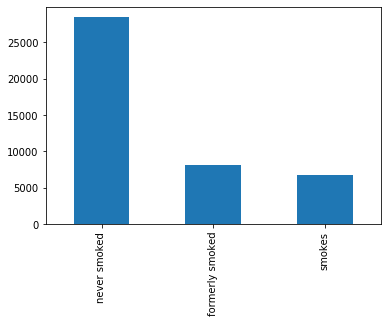

In [44]:
x['smoking_status'].value_counts().plot(kind="bar")

In [45]:
x=x.join(pd.get_dummies(x['smoking_status']))
x=x.drop(["smoking_status","smokes"],axis=1)

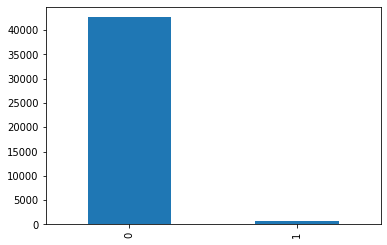

In [46]:
y.value_counts().plot(kind="bar")

783 true values for stroke out of 43400

## Undersampling

In [47]:
updated_df=x.join(y)

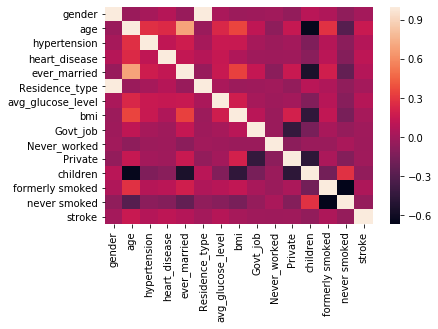

In [126]:
sns.heatmap(updated_df.corr())

In [49]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 15 columns):
gender               43400 non-null int64
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null int64
Residence_type       43400 non-null int64
avg_glucose_level    43400 non-null float64
bmi                  43400 non-null float64
Govt_job             43400 non-null uint8
Never_worked         43400 non-null uint8
Private              43400 non-null uint8
children             43400 non-null uint8
formerly smoked      43400 non-null uint8
never smoked         43400 non-null uint8
stroke               43400 non-null int64
dtypes: float64(3), int64(6), uint8(6)
memory usage: 3.2 MB


In [67]:
idx_stroke=updated_df[updated_df['stroke']==1].index.values
idx_not=updated_df[updated_df['stroke']!=1].index.values
idx_not=np.random.choice(idx_not,len(idx_stroke))
idx=np.concatenate([idx_stroke,idx_not])
np.random.shuffle(idx)
undersample_df=updated_df.iloc[idx,:]

In [69]:
under_x=undersample_df.drop("stroke",axis=1).values
under_y=undersample_df["stroke"].values

In [70]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(under_x,under_y,test_size=0.3)

In [102]:
from sklearn.linear_model import LogisticRegression
dtree=LogisticRegression()
dtree.fit(xtrain,ytrain)

/home/ubu/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
under_pred=dtree.predict(xtest)

In [104]:
from sklearn.metrics import roc_curve,precision_score,recall_score

In [113]:
dtree.score(xtest,ytest)

0.7617021276595745

In [114]:
recall_score(ytest,under_pred)

0.7890295358649789

In [115]:
precision_score(ytest,under_pred)

0.751004016064257

Undersampling prediction on whole dataset

In [116]:
pred=dtree.predict(x)

In [117]:
dtree.score(x,y)

0.7388940092165899

In [118]:
recall_score(y,pred)

0.8173690932311622

In [119]:
precision_score(y,pred)

0.05410431989179136